<a href="https://colab.research.google.com/github/DarShabi/OCR-Company-Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import glob
import json
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
root_folder = "/content/drive/MyDrive/Data/Data_samples"

# EDA Functions

In [4]:
def image_properties(img_paths):
    """
    Analyze and plot the properties of images: width, height, mode (color scale)

    Parameters:
    img_paths (list): A list of paths to the images.

    """
    widths = []
    heights = []
    modes = []

    for path in img_paths:
        with Image.open(path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
            modes.append(img.mode)

    # Plotting
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.hist(widths, bins=20)
    plt.title('Image Widths')

    plt.subplot(1, 3, 2)
    plt.hist(heights, bins=20)
    plt.title('Image Heights')

    plt.subplot(1, 3, 3)
    plt.hist(modes, bins=20)
    plt.title('Image Modes')

    plt.tight_layout()
    plt.show()


In [5]:
def text_length_distribution(texts):
    """
    Analyze and plot the length distribution of texts

    Parameters:
    texts (list): A list of texts.

    """
    lengths = [len(text) for text in texts]

    pd.Series(lengths).hist(bins=20)
    plt.title('Text Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()


In [6]:
def image_quality(img_paths):
    """
    Analyze and plot the average pixel intensity (brightness) of images

    Parameters:
    img_paths (list): A list of paths to the images.

    """
    avg_intensities = []

    for path in img_paths:
        with Image.open(path) as img:
            img_gray = img.convert("L")  # convert image to grayscale
            avg_intensity = np.array(img_gray).mean()
            avg_intensities.append(avg_intensity)

    plt.hist(avg_intensities, bins=20)
    plt.title('Image Average Intensity')
    plt.xlabel('Average Intensity')
    plt.ylabel('Frequency')
    plt.show()


In [13]:
def load_images_and_annotations_from_folders(root_folder):
    """
    Loads all images and corresponding JSON annotations from subfolders.

    Parameters:
    root_folder (str): Path to the root folder.

    Returns:
    list, list: A list of paths to the images and a list of corresponding text annotations.
    """
    img_paths = []
    texts = []
    # Iterate through all subdirectories
    for subdir, dirs, files in os.walk(root_folder):
        for file in files:
            # Process only .jpg files that do not contain 'thumb' in their names
            if file.endswith('.jpg') and 'thumb' not in file:
                img_path = os.path.join(subdir, file)
                img_paths.append(img_path)
                # Construct corresponding .analysis.json file path
                json_path = os.path.splitext(img_path)[0] + '.analysis.json'
                # Check if corresponding .analysis.json file exists
                if os.path.isfile(json_path):
                    with open(json_path, 'r') as json_file:
                        annotation = json.load(json_file)
                        texts.append(annotation['text'])
    return img_paths, texts

In [19]:
def explore_fields(root_folder):
    """
    Explore and count the occurrence of all available fields in JSON annotation files
    in the given root directory, including nested fields.

    Parameters:
    root_folder (str): Path to the root folder containing subdirectories with JSON files.

    Returns:
    collections.Counter: A Counter object containing the counts for all fields present
                         in the ".analysis.json" files, including nested fields.
    """
    fields_counter = Counter()

    # Recursive function to handle nested keys
    def process_keys(dictionary, prefix=""):
        for key in dictionary:
            full_key = f"{prefix}.{key}" if prefix else key
            fields_counter[full_key] += 1
            if isinstance(dictionary[key], dict):
                process_keys(dictionary[key], prefix=full_key)

    # Iterate through all subdirectories
    for subdir, dirs, files in os.walk(root_folder):
        for file in files:
            # Process only .analysis.json files that do not contain 'thumb' in their names
            if file.endswith('.analysis.json') and 'thumb' not in file:
                json_path = os.path.join(subdir, file)
                # Check if corresponding .analysis.json file exists
                if os.path.isfile(json_path):
                    with open(json_path, 'r') as json_file:
                        annotation = json.load(json_file)
                        process_keys(annotation)

    return fields_counter

# Excuting

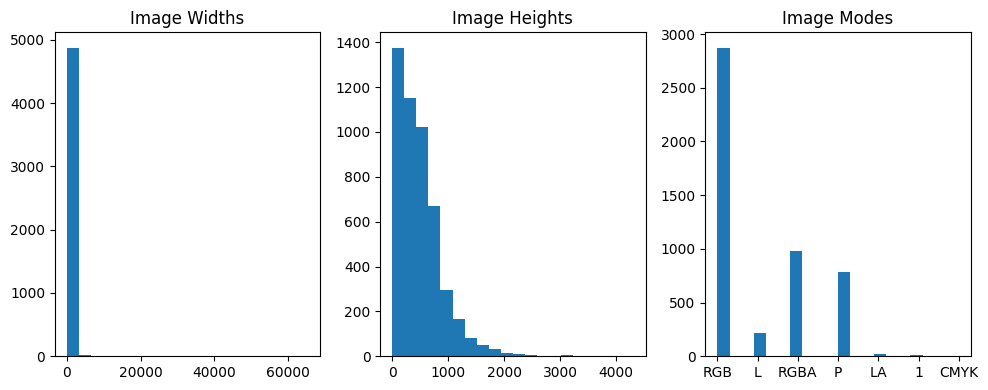

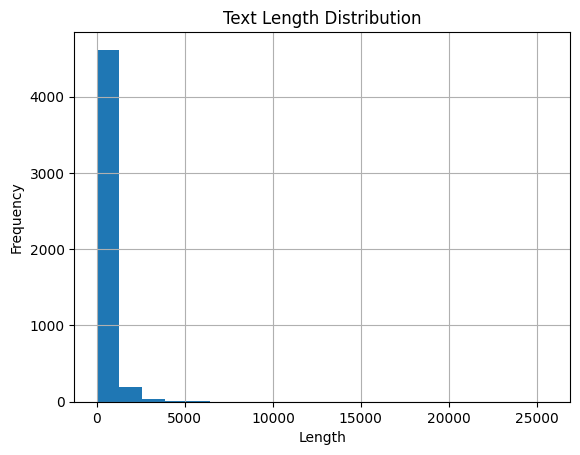

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


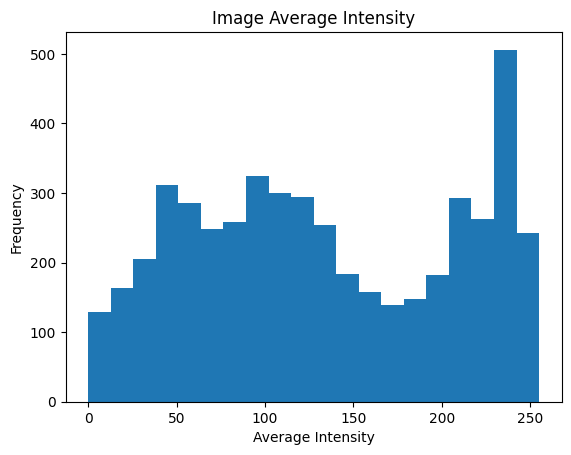

In [14]:
# Load images and annotations
img_paths, texts = load_images_and_annotations_from_folders(root_folder)

# Execute EDA functions
image_properties(img_paths)
text_length_distribution(texts)
image_quality(img_paths)

In [21]:
fields_counts = explore_fields(root_folder)
for field, count in fields_counts.items():
    print(f"Field: {field} ----- Count: {count}")


Field: ocr_text_info ----- Count: 2536
Field: ocr_text_info.all_text ----- Count: 2122
Field: ocr_text_info.is_arabic ----- Count: 2536
Field: safe_search ----- Count: 4965
Field: safe_search.medical ----- Count: 4965
Field: safe_search.spoof ----- Count: 4965
Field: safe_search.violence ----- Count: 4965
Field: safe_search.adult ----- Count: 4965
Field: size ----- Count: 4951
Field: size.width ----- Count: 4951
Field: size.height ----- Count: 4951
Field: text ----- Count: 4965
Field: is_emoji ----- Count: 2860
